## Prediction Task

The dataset for this section was obtained from the exploratory data analysis section. In the previous section, feature engineering was done to create new fields such as the number of missing values in an H1B-LCA application, the wage difference (difference between wage offered and prevailing wage), as well as wage ratio and prevailing wage difference.  Wage ratio refers to the ratio of prevailing wage to wage offered while prevailing wage difference is the difference between prevailing wage listed in the application and the prevailing wage for the position on the Foreign Labor Certification Data Center Online Wage Library.  

The goal of the prediction task, the final step in the report, is to identify a classfier that best classifies applications as denied or certified. In addition, H1B-LCA application fields that are highly impactful on the application outcome need to be identified so that employers can improve their application success rate in the future.  
A classification task will be performed with all of the relevant fields initially so that no important field is mistakenly left out.  The prediction will determine the probability of an application being certified and whether it is denied or certified. 

The first five applications in the dataset are shown below.  More wrangling steps need to be done such as conversion of categorical variables to numerical variables before classifiers can be applied.


In [1]:
import warnings
import pandas as pd
import numpy as np


warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
df=pd.read_csv('cleaned1.csv')
df.head(5)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_DIFFERENCE,MAX_WAGE_INDICATOR,PREVAILING_WAGE_INDICATOR,CASE_STATUS_INDICATOR,PW_WAGE_DIFF,Miss_value_x,WAGE_RATIO
0,I-200-16055-173457,CERTIFIED,2/24/2016,H-1B,8/10/2016,8/10/2019,DISCOVER PRODUCTS INC.,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",ASSOCIATE DATA INTEGRATION,15-1121,COMPUTER SYSTEMS ANALYSTS,Credit Card Issuing,1,1,0,0,0,0,0,Y,59197.0,Year,Level I,OES,2015.0,OFLC ONLINE DATA CENTER,65811.0,"67,320.00",Year,N,N,None,Y,RIVERWOODS,LAKE,IL,60015,6614.0,0,0,1,-1893.0,1,0.899500
1,I-200-16064-557834,CERTIFIED,3/4/2016,H-1B,8/16/2016,8/16/2019,DFS SERVICES LLC,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",SENIOR ASSOCIATE,15-2031,OPERATIONS RESEARCH ANALYSTS,Credit Card Issuing,1,1,0,0,0,0,0,Y,49800.0,Year,None,Other,2015.0,TOWERS WATSON DATA SERVICES 2015 CSR PROFESSIO...,53000.0,"57,200.00",Year,N,N,None,Y,RIVERWOODS,LAKE,IL,60015,3200.0,0,0,1,NaN,2,0.939623
2,I-200-16063-996093,CERTIFIED,3/10/2016,H-1B,9/9/2016,9/9/2019,EASTBANC TECHNOLOGIES LLC,1211 31ST ST. NW,WASHINGTON,DC,20007,UNITED STATES OF AMERICA,Y,"BURKE, KAREN",.NET SOFTWARE PROGRAMMER,15-1131,COMPUTER PROGRAMMERS,Custom Computer Programming Services,2,2,0,0,0,0,0,Y,76502.0,Year,Level II,OES,2015.0,OFLC ONLINE DATA CENTER,77000.0,77000.0,Year,Y,N,Y,None,WASHINGTON,None,DC,20007,498.0,0,0,1,-7446.0,2,0.993532
3,I-200-15053-636744,CERTIFIED,2/22/2015,H-1B,3/1/2015,3/1/2018,BB&T CORPORATION,223 WEST NASH STREET,WILSON,NC,27893,UNITED STATES OF AMERICA,Y,"SCOFIELD, EILEEN",ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,13-2041,CREDIT ANALYSTS,Commercial Banking,1,0,0,0,0,1,0,Y,116605.0,Year,Level III,OES,2015.0,OFLC ONLINE DATA CENTER,132500.0,132500.0,Year,N,N,None,Y,NEW YORK,NEW YORK,NY,10036,15895.0,0,0,1,NaN,1,0.880038
4,I-200-15071-336195,CERTIFIED,3/12/2015,H-1B,9/11/2015,9/11/2018,"SUNTRUST BANKS, INC.","303 PEACHTREE STREET, NE",ATLANTA,GA,30308,UNITED STATES OF AMERICA,Y,"SCOFIELD, EILEEN",CREDIT RISK METRICS SPECIALIST,13-2099,"FINANCIAL SPECIALISTS, ALL OTHER",Commercial Banking,1,1,0,0,0,0,0,Y,59405.0,Year,Level III,OES,2015.0,OFLC ONLINE DATA CENTER,71750.0,71750.0,Year,N,N,None,Y,ATLANTA,FULTON,GA,30303,12345.0,0,0,1,-0.2,1,0.827944


The application outcome field CASE_STATUS was mapped to 1 for certified applications as well as certified applications that were eventually withdrawn.  All denied applications were mapped to 0.  Certified applications represent the majority class with 98.596% applications certified.  

In [2]:
d={'CERTIFIED-WITHDRAWN': 1, 'CERTIFIED': 1, 'DENIED': 0}
df['CASE_STATUS']=df['CASE_STATUS'].map(d)

### Classification Metrics

The following metrics were used to compare the performance of the baseline classifier and other classifiers against one another.  

**-Classification Accuracy**: Fraction of applications correctly classified


$$accuracy = \frac{tp + tn}{tp+tn+fp+fn}$$


where 

tp is the number of true positives,<br>
tn is the number of true negatives,<br>
fp is the number of false positives,<br>
and fn is the number of false negatives.<br>

**-False Positive Rate**: Fraction of denied applications labeled as certified. 

$$FPR = \frac{fp}{fp+tn}$$

**-False Negative Rate**: Fraction of certified applications classified as denied.  

$$FNR = \frac{fn}{fn+tp}$$


**-Balanced Error Rate**: Average of the false negative rate and false positive rate. 

$$ BER = \frac{FPR+FNR}{2} $$


**-F1 Score**: Another measure of accuracy that uses precision and recall.


- Precision is the ratio of true positives to applications that were predicted to be positive.

- Recall is the ratio of true positives to applications that were actually positive.  

    $$ F{1}\: Score = \frac{2*precision*recall}{precision+recall} $$

**-AUC**: Area under the curve of the ROC-curve (True positive Rate vs. False Positive Rate).  AUC represents the probability of a randomly drawn certified application having a higher probability of being certified compared to a randomly drawn denied application.  

 


### Feature Selection

All of the relevant features as well as the engineered features were used as inputs to the classifiers.  The most important features will be revealed once the classifiers are used.

The missing values in the wage ratio and prevailing wage difference fields were replaced with the average value while the attorney name and prevailing wage source year fields were replaced with None and the year 2017.0 respectively. The year 2017 was used as it is the most recent and common year for prevailing wages.  

In [264]:
df[df==np.inf]=np.nan
df['WAGE_RATIO'] = df['WAGE_RATIO'].fillna((df['WAGE_RATIO'].mean()))  #fill missing values with average
df['AGENT_ATTORNEY_NAME']=df['AGENT_ATTORNEY_NAME'].fillna('None')     #fill missing values with 'None'
df['PW_WAGE_DIFF'] = df['PW_WAGE_DIFF'].fillna((df['PW_WAGE_DIFF'].mean())) #fill missing values with average 
df['PW_SOURCE_YEAR']=df['PW_SOURCE_YEAR'].fillna('None').replace('None', '2017.0').astype(float)  #convert column to float values
df['WAGE_RATE_OF_PAY_TO'] = df['WAGE_RATE_OF_PAY_TO'].str.replace(',', '').astype(float) #convert column to float values


The following columns: 'CASE_STATUS_INDICATOR', 'CASE_NUMBER', 'CASE_SUBMITTED', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'SOC_CODE', 'SOC_NAME', 'WORKSITE_COUNTY', and 'WORKSITE_POSTAL_CODE' were all dropped because they contain information that is similar to other columns that were kept or the fields contained irrelevant information to the target variable.  Dropping unnecessary columns prevents overfitting of the classifier as these columns add more information that a classifier has to conform to.  Employer location information was deemed not as important as worksite location for describing the workplace of the applicant, so these columns were dropped.  'SOC_CODE' and 'SOC_NAME' also known as occupation code are redundant fields as there is already a job title and industry field. Employment start date, end date, case number, and case submitted do not have any relationship with application outcome. Finally, worksite county and worksite zipcode was removed as there is already a worksite state and city field. Finally, case status indicator was dropped because it is a duplicate of the case status column which is the target variable.


In [122]:

columns_drop=['CASE_NUMBER', 'CASE_SUBMITTED', 'CASE_STATUS_INDICATOR', 'EMPLOYMENT_START_DATE', 
              'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS', 
              'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 
              'AGENT_ATTORNEY_NAME', 'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 
              'NAICS_CODE', 'PW_SOURCE_OTHER', 'WORKSITE_CITY', 
              'WORKSITE_COUNTY', 'WORKSITE_STATE', 'WORKSITE_POSTAL_CODE']

keeps_column=['EMPLOYER_NAME', 'AGENT_ATTORNEY_NAME', 'JOB_TITLE', 'NAICS_CODE', 'PW_SOURCE_OTHER', 'WORKSITE_CITY', 'WORKSITE_STATE']
for column in columns_drop: 
    
    if column not in keeps_column:
        df=df.drop(column, axis=1)


The categorical fields that had relatively low cardinality or number of unique values were encoded with one-hot k vectors.  This encoding method was not used for all the fields in order to prevent adding too many dimensions to the dataset. For all categorical fields with less than ten unique values, the fields were one-hot encoded.

The rest of the categorical variables with more than 10 unique values were target encoded.  This means each unique value was replaced with the acceptance rate of the employer.  Replacing the unique values in a categorical field captured information about historical acceptance rate and prevented too many new dimensions from being added to the data.  

In [123]:
columns_dummies=['VISA_CLASS', 'EMPLOYER_COUNTRY', 'AGENT_REPRESENTING_EMPLOYER', 'FULL_TIME_POSITION', 'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'PW_SOURCE', 'WAGE_UNIT_OF_PAY',
'H1B_DEPENDENT',
'WILLFUL_VIOLATOR',
'SUPPORT_H1B',
'LABOR_CON_AGREE']
for column in columns_dummies:
    if column in df.columns:
        dfDummies = pd.get_dummies(df[column], prefix = column)
        df = pd.concat([df, dfDummies], axis=1)
        df=df.drop(column, axis=1)

### Models

The dataset was seperated into two dataframes, the target variable (y) and the predictors (X).

In [124]:
y=df['CASE_STATUS']
X=df.drop('CASE_STATUS', axis=1)


#### Benchmark Classifier

A benchmark classifier is used to compare all the other classification methods against.

-ZeroR (Baseline): The ZeroR classifier used as a baseline simply classifies all applications as the majority class which in this case is certified.  

In [125]:
from sklearn.dummy import DummyClassifier


X_edit=X._get_numeric_data()
baseline=DummyClassifier(strategy="most_frequent")
baseline.fit(X_edit,y)
y_pred_baseline=baseline.predict(X_edit)
y_pred_prob_baseline=baseline.predict_proba(X_edit)[:,1]


ZeroR Baseline Accuracy: 0.98596

Confusion Matrix: 
Predicted       1
Actual           
0            8480
1          595398


False Positive Rate: 1.0
False Negative Rate: 0.0
Balanced Error Rate: 0.5

Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8480
           1       0.99      1.00      0.99    595398

   micro avg       0.99      0.99      0.99    603878
   macro avg       0.49      0.50      0.50    603878
weighted avg       0.97      0.99      0.98    603878

Macro Averaged F1 Score: 0.50


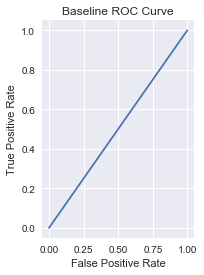

AUC of Baseline ROC Curve: 0.5


In [127]:
from IPython.display import display
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()

print('\033[1m' + 'ZeroR Baseline Accuracy: ' + '\033[0m' + str(round(baseline.score(X_edit, y),5)) + '\n')
print('\033[1m' + 'Confusion Matrix: ' + '\033[0m') 
print(pd.crosstab(y, y_pred_baseline, rownames=['Actual'], colnames=['Predicted']))
print('\n')

TN, FP, FN, TP = confusion_matrix(y, y_pred_baseline).ravel()

false_positive_rate = FP / float(TN + FP)
false_negative_rate = FN/ float(FN + TP)
balanced_error_rate = (false_negative_rate+false_positive_rate)/2

print('\033[1m' + 'False Positive Rate: ' + '\033[0m' + str(false_positive_rate))
print('\033[1m' + 'False Negative Rate: ' + '\033[0m' + str(false_negative_rate))
print('\033[1m' + 'Balanced Error Rate: ' + '\033[0m' + str(balanced_error_rate) + '\n')

print('\033[1m' + 'Classification Report: ' + '\033[0m')
print(classification_report(y, y_pred_baseline))

print('\033[1m' + 'Macro Averaged F1 Score: ' + '\033[0m' + '0.50' )
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y, y_pred_prob_baseline)

#Plot ROC curve

fig=plt.figure()
fig.add_subplot(1,2,1)
#plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline ROC Curve');
display(fig)
plt.close()

print('\033[1m' + "AUC of Baseline ROC Curve: " + '\033[0m' + "{}".format(roc_auc_score(y, y_pred_prob_baseline)))



#### Sampling

The following function is a sampling function that takes in the training data as inputs and outputs a subsample of the data.  In this case, the number of samples was reduced in order to reduce classification time for the subsequent machine learning models.  The originial class imbalance of 98.596 certified applications for 1 denied application was not altered.  Stratified sampling was used instead because changing the target variable ratio would require the probabilities outputted by model to also be calibrated.  The number of samples used for the minority class was 500 while the number of samples for the majority class was 98.596 times the number of denied applications.  

In [96]:
from sklearn.utils import resample
def downsample(X_train, y_train):
    merged=X_train.merge(y_train.to_frame(), how='inner', left_index=True, right_index=True)
    df_majority = merged[merged.CASE_STATUS==1]
    df_minority = merged[merged.CASE_STATUS==0]
    
    df_minority_downsampled = resample(df_minority, 
                                 replace=False,    # sample without replacement
                                 n_samples=500) 
    
 
    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=int(98.596*len(df_minority_downsampled))) 
 
    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority_downsampled])
    
    y_train=df_downsampled['CASE_STATUS']
    X_train=df_downsampled.drop('CASE_STATUS', axis=1)
    
    return X_train, y_train

The following classifiers were used to prediction application outcome: Logistic Regression, Gaussian Naive Bayes, Decision Tree, Random Forest, and Gradient Boost.


#### A.) Logistic Regression

A Logistic Regression classifier produces a probability of the target variable having a certain value based on a combination of the predictors.  Logistic regression chooses coefficients that maximize the likelihood of observing the target variable.  The benefit of logistic regression is that the probability of a recieving a certified application is outputted.  However, a downside is that logistic regression assumes the target variable is linearly seperable.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder


steps=[('enc', TargetEncoder(cols=None, return_df=False)), ('scale', StandardScaler()), ('logreg', LogisticRegression(tol=0.1, max_iter=100))]
pipeline=Pipeline(steps)

parameters_logreg={"logreg__C": [0.01], 'logreg__penalty':['l1'], 'logreg__solver':['saga']}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train, y_train=downsample(X_train,y_train)

X_train_logreg = X_train.reset_index(inplace=False, drop=True).values
y_train_logreg = y_train.reset_index(inplace=False, drop=True).values
X_test_logreg = X_test.reset_index(inplace=False, drop=True).values
y_test_logreg = y_test.reset_index(inplace=False, drop=True).values


clf_logreg = GridSearchCV(pipeline, parameters_logreg, cv=5)

clf_logreg.fit(X_train_logreg, y_train_logreg)

y_pred_logreg=clf_logreg.predict(X_test_logreg)
y_pred_prob_logreg = clf_logreg.predict_proba(X_test_logreg)[:,1] # Compute predicted probabilities: y_pred_prob



Logistic Regression Accuracy: 0.98448

Confusion Matrix: 
Predicted    0       1
Actual                
0           30    1666
1          209  118871


False Positive Rate: 0.98231
False Negative Rate: 0.00176
Balanced Error Rate: 0.49203

Classification Report: 
              precision    recall  f1-score   support

           0       0.13      0.02      0.03      1696
           1       0.99      1.00      0.99    119080

   micro avg       0.98      0.98      0.98    120776
   macro avg       0.56      0.51      0.51    120776
weighted avg       0.97      0.98      0.98    120776

Macro Averaged F1 Score: 0.51


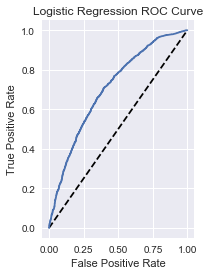

AUC of Logistic Regression ROC Curve: 0.70458
Top 10 features that contribute to denied application:


[('WAGE_RATIO', -0.021970499231050246),
 ('PREVAILING_WAGE', -0.019007569381840304),
 ('PW_SOURCE_None', -0.018223339288626773),
 ('PW_UNIT_OF_PAY_None', -0.008267673940262529),
 ('PW_SOURCE_DBA', -0.004349472851412791),
 ('VISA_CLASS_E-3 Australian', -0.0035631943999086028),
 ('AGENT_REPRESENTING_EMPLOYER_N', -0.0027464487446458626),
 ('LABOR_CON_AGREE_Y', -0.0008545142219562648),
 ('PW_WAGE_LEVEL_None', -0.0008277273436280879),
 ('WILLFUL_VIOLATOR_None', -0.0005054771555893873)]

In [171]:
print('\033[1m' + 'Logistic Regression Accuracy: ' + '\033[0m' + str(round(accuracy_score(y_test_logreg, y_pred_logreg),5)) + '\n')
print('\033[1m' + 'Confusion Matrix: ' + '\033[0m') 
print(pd.crosstab(y_test_logreg, y_pred_logreg, rownames=['Actual'], colnames=['Predicted']))
print('\n')

TN, FP, FN, TP = confusion_matrix(y_test_logreg, y_pred_logreg).ravel()

false_positive_rate = FP / float(TN + FP)
false_negative_rate = FN/ float(FN + TP)
balanced_error_rate = (false_negative_rate+false_positive_rate)/2

print('\033[1m' + 'False Positive Rate: ' + '\033[0m' + str(round(false_positive_rate, 5)))
print('\033[1m' + 'False Negative Rate: ' + '\033[0m' + str(round(false_negative_rate, 5)))
print('\033[1m' + 'Balanced Error Rate: ' + '\033[0m' + str(round(balanced_error_rate, 5)) + '\n')

print('\033[1m' + 'Classification Report: ' + '\033[0m')
print(classification_report(y_test_logreg, y_pred_logreg))

print('\033[1m' + 'Macro Averaged F1 Score: ' + '\033[0m' + '0.51' )
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_logreg, y_pred_prob_logreg)

#Plot ROC curve

fig=plt.figure()
fig.add_subplot(1,2,1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve');
display(fig)
plt.close()

print('\033[1m' + "AUC of Logistic Regression ROC Curve: " + '\033[0m' + "{}".format(round(roc_auc_score(y_test_logreg, y_pred_prob_logreg), 5)))

print('\033[1m' + 'Top 10 features that contribute to denied application:' + '\033[0m')
sorted(list(zip(X.columns, clf_logreg.best_estimator_.steps[-1][1].coef_[0])), key=lambda x: x[1])[:10]



#### B.) Gaussian Naive Bayes

The Gaussian Naive Bayes classifier determines the conditional probability of the target variable according to Bayes Theorem.  The probabilities of the predictors given the occurence of the target variable are approximated using a Gaussian distribution.  The advantage of Naive Bayes is that it is computationally fast and does not require hyperparamter tuning.  The disadvantage is that the classifier assumes indpendence of all predictors even though this is rarely the case.  

In [25]:
from sklearn.naive_bayes import GaussianNB


steps=[('enc', TargetEncoder(cols=None, return_df=False)), ('scalar', StandardScaler()), ('nb', GaussianNB())]
pipeline=Pipeline(steps)

parameters_nb = [{}]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, y_train=downsample(X_train,y_train)

X_train_nb = X_train.reset_index(inplace=False, drop=True).values
y_train_nb = y_train.reset_index(inplace=False, drop=True).values
X_test_nb = X_test.reset_index(inplace=False, drop=True).values
y_test_nb = y_test.reset_index(inplace=False, drop=True).values


clf_nb = GridSearchCV(pipeline, parameters_nb, cv=5)

clf_nb.fit(X_train_nb, y_train_nb)

y_pred_nb=clf_nb.predict(X_test_nb)
y_pred_prob_nb = clf_nb.predict_proba(X_test_nb)[:,1] # Compute predicted probabilities: y_pred_prob

Naive Bayes Accuracy: 0.95695

Confusion Matrix: 
Predicted     0       1
Actual                 
0           297    1391
1          3809  115279


False Positive Rate: 0.82405
False Negative Rate: 0.03198
Balanced Error Rate: 0.42802

Classification Report: 
              precision    recall  f1-score   support

           0       0.07      0.18      0.10      1688
           1       0.99      0.97      0.98    119088

   micro avg       0.96      0.96      0.96    120776
   macro avg       0.53      0.57      0.54    120776
weighted avg       0.98      0.96      0.97    120776

Macro Averaged F1 Score: 0.54


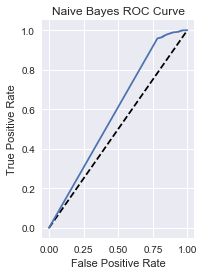

AUC of Naive Bayes ROC Curve: 0.5888


In [168]:
print('\033[1m' + 'Naive Bayes Accuracy: ' + '\033[0m' + str(round(accuracy_score(y_test_nb, y_pred_nb),5)) + '\n')
print('\033[1m' + 'Confusion Matrix: ' + '\033[0m') 
print(pd.crosstab(y_test_nb, y_pred_nb, rownames=['Actual'], colnames=['Predicted']))
print('\n')

TN, FP, FN, TP = confusion_matrix(y_test_nb, y_pred_nb).ravel()

false_positive_rate = FP / float(TN + FP)
false_negative_rate = FN/ float(FN + TP)
balanced_error_rate = (false_negative_rate+false_positive_rate)/2

print('\033[1m' + 'False Positive Rate: ' + '\033[0m' + str(round(false_positive_rate, 5)))
print('\033[1m' + 'False Negative Rate: ' + '\033[0m' + str(round(false_negative_rate, 5)))
print('\033[1m' + 'Balanced Error Rate: ' + '\033[0m' + str(round(balanced_error_rate, 5)) + '\n')

print('\033[1m' + 'Classification Report: ' + '\033[0m')
print(classification_report(y_test_nb, y_pred_nb))

print('\033[1m' + 'Macro Averaged F1 Score: ' + '\033[0m' + '0.54' )
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_nb, y_pred_prob_nb)

#Plot ROC curve

fig=plt.figure()
fig.add_subplot(1,2,1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve');
display(fig)
plt.close()

print('\033[1m' + "AUC of Naive Bayes ROC Curve: " + '\033[0m' + "{}".format(round(roc_auc_score(y_test_nb, y_pred_prob_nb), 5)))




#### C.) Decision Tree

A decision tree classifier is the simplest of tree methods as it only constructs one tree to perform a classification.  The decision tree finds the best split in a predictor's distribution that seperate the classes of the target variable until a specified tree depth is reached.  An advantage of using a decision tree is that they are simple to understand and interpret as well as visualize. The disadvantage of a decision tree is that they can easily overfit if the max tree depth is too large and only one tree is constructed.  

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier


steps=[('enc', TargetEncoder(cols=None, return_df=False)), ('scalar', StandardScaler()), ('tree', DecisionTreeClassifier())]
pipeline=Pipeline(steps)

parameters_dt = {'tree__max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, y_train=downsample(X_train,y_train)

X_train_dt = X_train.reset_index(inplace=False, drop=True).values
y_train_dt = y_train.reset_index(inplace=False, drop=True).values
X_test_dt = X_test.reset_index(inplace=False, drop=True).values
y_test_dt = y_test.reset_index(inplace=False, drop=True).values


clf_dt = GridSearchCV(pipeline, parameters_dt, cv=5)

clf_dt.fit(X_train_dt, y_train_dt)

y_pred_dt=clf_dt.predict(X_test_dt)
y_pred_prob_dt = clf_dt.predict_proba(X_test_dt)[:,1] # Compute predicted probabilities: y_pred_prob

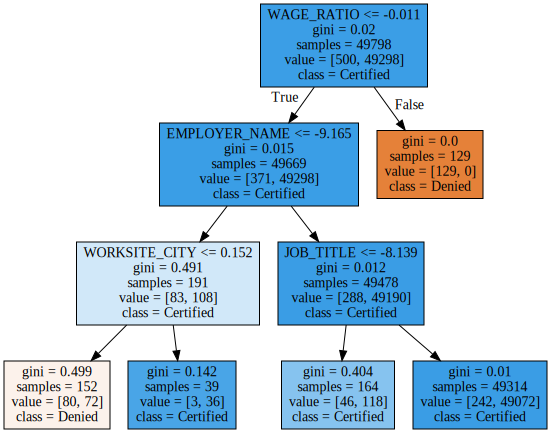

In [195]:
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(clf_dt.best_estimator_.steps[-1][1], out_file=None, 
               feature_names=X.columns, class_names=['Denied', 'Certified'], filled=True, rotate=False))

display(SVG(graph.pipe(format='svg')))


Decision Tree Accuracy: 0.98821

Confusion Matrix: 
Predicted    0       1
Actual                
0          411    1264
1          160  118941


False Positive Rate: 0.75463
False Negative Rate: 0.00134
Balanced Error Rate: 0.37799

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.25      0.37      1675
           1       0.99      1.00      0.99    119101

   micro avg       0.99      0.99      0.99    120776
   macro avg       0.85      0.62      0.68    120776
weighted avg       0.99      0.99      0.99    120776

Macro Averaged F1 Score: 0.68


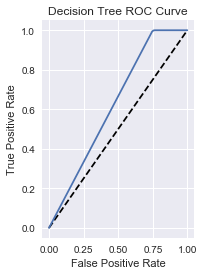

AUC of Decision Tree ROC Curve: 0.62475
Top features in decision tree that contribute to application outcome:


[('WAGE_RATIO', 0.7025877725772438),
 ('EMPLOYER_NAME', 0.193858990744131),
 ('JOB_TITLE', 0.06880950422898695),
 ('WORKSITE_CITY', 0.034743732449638326)]

In [167]:
print('\033[1m' + 'Decision Tree Accuracy: ' + '\033[0m' + str(round(accuracy_score(y_test_dt, y_pred_dt),5)) + '\n')
print('\033[1m' + 'Confusion Matrix: ' + '\033[0m') 
print(pd.crosstab(y_test_dt, y_pred_dt, rownames=['Actual'], colnames=['Predicted']))
print('\n')

TN, FP, FN, TP = confusion_matrix(y_test_dt, y_pred_dt).ravel()

false_positive_rate = FP / float(TN + FP)
false_negative_rate = FN/ float(FN + TP)
balanced_error_rate = (false_negative_rate+false_positive_rate)/2

print('\033[1m' + 'False Positive Rate: ' + '\033[0m' + str(round(false_positive_rate, 5)))
print('\033[1m' + 'False Negative Rate: ' + '\033[0m' + str(round(false_negative_rate, 5)))
print('\033[1m' + 'Balanced Error Rate: ' + '\033[0m' + str(round(balanced_error_rate, 5)) + '\n')

print('\033[1m' + 'Classification Report: ' + '\033[0m')
print(classification_report(y_test_dt, y_pred_dt))

print('\033[1m' + 'Macro Averaged F1 Score: ' + '\033[0m' + '0.68' )
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_dt, y_pred_prob_dt)

#Plot ROC curve

fig=plt.figure()
fig.add_subplot(1,2,1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve');
display(fig)
plt.close()

print('\033[1m' + "AUC of Decision Tree ROC Curve: " + '\033[0m' + "{}".format(round(roc_auc_score(y_test_dt, y_pred_prob_dt), 5)))


print('\033[1m' + 'Top features in decision tree that contribute to application outcome:' + '\033[0m')
sorted(list(zip(X.columns, clf_dt.best_estimator_.steps[-1][1].feature_importances_)), key=lambda x: x[1], reverse=True)[:4]



#### D.) Random Forest

The random forest classifier is an ensemble method that uses many decision trees that have had bootstrap aggregating or bagging done on the samples. Bagging means that samples are chosen at random with replacement to reduce variance in any single tree.  Random forests in addition take a subset of the predictors when constructing a tree so that each tree is more different from one another.  The combination of the trees made from bagged samples and subsetted predictors is the random forest result.  Compared to a decision tree, a random forest improves accuracy by determining class from the majority of votes for each sample in the many trees.

In [1]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline 

steps=[('enc', TargetEncoder(cols=None, return_df=False)), ('scalar', StandardScaler()), ('randoforest', RandomForestClassifier())]
pipeline=Pipeline(steps)

parameters_rf = [{
    'randoforest__n_estimators':      [250],
    'randoforest__criterion':         ['gini'],
    'randoforest__max_features':      ['auto'],
    'randoforest__class_weight':      ['balanced']
    #'randoforest__min_samples_leaf':  list(range(2, 8))
}]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, y_train=downsample(X_train,y_train)

X_train_rf = X_train.reset_index(inplace=False, drop=True).values
y_train_rf = y_train.reset_index(inplace=False, drop=True).values
X_test_rf = X_test.reset_index(inplace=False, drop=True).values
y_test_rf = y_test.reset_index(inplace=False, drop=True).values


clf_rf = GridSearchCV(pipeline, parameters_rf, cv=5)

clf_rf.fit(X_train_rf, y_train_rf)

y_pred_rf=clf_rf.predict(X_test_rf)
y_pred_prob_rf = clf_rf.predict_proba(X_test_rf)[:,1] # Compute predicted probabilities: y_pred_prob

NameError: name 'TargetEncoder' is not defined

Random Forest Accuracy: 0.98726

Confusion Matrix: 
Predicted    0       1
Actual                
0          223    1473
1           66  119014


False Positive Rate: 0.86851
False Negative Rate: 0.00055
Balanced Error Rate: 0.43453

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.13      0.22      1696
           1       0.99      1.00      0.99    119080

   micro avg       0.99      0.99      0.99    120776
   macro avg       0.88      0.57      0.61    120776
weighted avg       0.98      0.99      0.98    120776

Macro Averaged F1 Score: 0.61


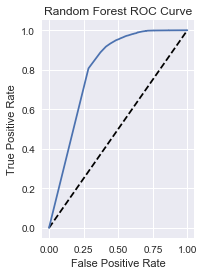

AUC of Random Forest ROC Curve: 0.80291
Top 10 features in decision tree that contribute to application outcome:


[('EMPLOYER_NAME', 0.24461797058983173),
 ('AGENT_ATTORNEY_NAME', 0.13789592708819845),
 ('JOB_TITLE', 0.13385725518122024),
 ('WORKSITE_CITY', 0.11577440725232181),
 ('NAICS_CODE', 0.07569265147515541),
 ('WAGE_RATIO', 0.04158273140184172),
 ('WAGE_DIFFERENCE', 0.03702620892719842),
 ('PW_SOURCE_OTHER', 0.03187854085923071),
 ('WAGE_RATE_OF_PAY_FROM', 0.024986352621405184),
 ('WAGE_RATE_OF_PAY_TO', 0.020465396180871724)]

In [166]:
print('\033[1m' + 'Random Forest Accuracy: ' + '\033[0m' + str(round(accuracy_score(y_test_rf, y_pred_rf),5)) + '\n')
print('\033[1m' + 'Confusion Matrix: ' + '\033[0m') 
print(pd.crosstab(y_test_rf, y_pred_rf, rownames=['Actual'], colnames=['Predicted']))
print('\n')

TN, FP, FN, TP = confusion_matrix(y_test_rf, y_pred_rf).ravel()

false_positive_rate = FP / float(TN + FP)
false_negative_rate = FN/ float(FN + TP)
balanced_error_rate = (false_negative_rate+false_positive_rate)/2

print('\033[1m' + 'False Positive Rate: ' + '\033[0m' + str(round(false_positive_rate, 5)))
print('\033[1m' + 'False Negative Rate: ' + '\033[0m' + str(round(false_negative_rate, 5)))
print('\033[1m' + 'Balanced Error Rate: ' + '\033[0m' + str(round(balanced_error_rate, 5)) + '\n')

print('\033[1m' + 'Classification Report: ' + '\033[0m')
print(classification_report(y_test_rf, y_pred_rf))

print('\033[1m' + 'Macro Averaged F1 Score: ' + '\033[0m' + '0.61' )
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_prob_rf)

#Plot ROC curve

fig=plt.figure()
fig.add_subplot(1,2,1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve');
display(fig)
plt.close()

print('\033[1m' + "AUC of Random Forest ROC Curve: " + '\033[0m' + "{}".format(round(roc_auc_score(y_test_rf, y_pred_prob_rf), 5)))


print('\033[1m' + 'Top 10 features in decision tree that contribute to application outcome:' + '\033[0m')
sorted(list(zip(X.columns, clf_rf.best_estimator_.steps[-1][1].feature_importances_)), key=lambda x: x[1], reverse=True)[:10]

#### E.) Gradient Boosted Classifier


A gradient boosted classifier involves combining a large number of trees.  Each subsequent tree that is constructed is done so based on the least pure splits created by the previous tree.  The trees are added back to the previous tree so that the tree can learn slowly and improve classification accuracy.  An advantage to gradient boosted trees is that compared to a decision tree that may overfit to one set of the data because gradient boosted trees learn by focusing on the worst split in a tree and improve over time.  The disadvantages of gradient boosted trees is that they may overfit compared to random forests.

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

steps=[('enc', TargetEncoder(cols=None, return_df=False)), ('scalar', StandardScaler()), ('grad', GradientBoostingClassifier())]
pipeline=Pipeline(steps)

parameters_grad = [{
    'grad__n_estimators':      [250],
    'grad__max_features':      ['auto'],
    #'grad__min_samples_leaf':  list(range(2, 7)),
    #'grad__loss' :             ['deviance', 'exponential'],
    #'grad__learning_rate':     [0.025, 0.05, 0.075, 0.1],
}]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, y_train=downsample(X_train,y_train)

X_train_grad = X_train.reset_index(inplace=False, drop=True).values
y_train_grad = y_train.reset_index(inplace=False, drop=True).values
X_test_grad = X_test.reset_index(inplace=False, drop=True).values
y_test_grad = y_test.reset_index(inplace=False, drop=True).values


clf_grad = GridSearchCV(pipeline, parameters_grad, cv=5)

clf_grad.fit(X_train_grad, y_train_grad)

y_pred_grad=clf_grad.predict(X_test_grad)
y_pred_prob_grad = clf_grad.predict_proba(X_test_grad)[:,1] # Compute predicted probabilities: y_pred_prob

Gradient Boosted Classifier Accuracy: 0.9877

Confusion Matrix: 
Predicted    0       1
Actual                
0          489    1260
1          226  118801


False Positive Rate: 0.72041
False Negative Rate: 0.0019
Balanced Error Rate: 0.36116

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.28      0.40      1749
           1       0.99      1.00      0.99    119027

   micro avg       0.99      0.99      0.99    120776
   macro avg       0.84      0.64      0.70    120776
weighted avg       0.99      0.99      0.99    120776

Macro Averaged F1 Score: 0.70


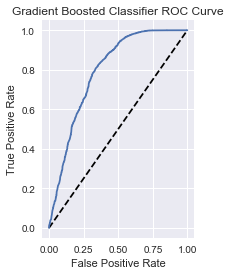

AUC of Gradient Boosted Classifier ROC Curve: 0.79205
Top 10 features in gradient boosted classifer that contribute to application outcome:


[('EMPLOYER_NAME', 0.17678304664930802),
 ('WAGE_DIFFERENCE', 0.16368912766909788),
 ('JOB_TITLE', 0.12907890186858093),
 ('WORKSITE_CITY', 0.11892738846250303),
 ('AGENT_ATTORNEY_NAME', 0.07737866080497073),
 ('PW_SOURCE_OTHER', 0.07591207504850066),
 ('NAICS_CODE', 0.04256020148691549),
 ('PW_SOURCE_OES', 0.025145625105995963),
 ('PREVAILING_WAGE', 0.01952722609497189),
 ('NEW_EMPLOYMENT', 0.01781535022098397)]

In [164]:
print('\033[1m' + 'Gradient Boosted Classifier Accuracy: ' + '\033[0m' + str(round(accuracy_score(y_test_grad, y_pred_grad),5)) + '\n')
print('\033[1m' + 'Confusion Matrix: ' + '\033[0m') 
print(pd.crosstab(y_test_grad, y_pred_grad, rownames=['Actual'], colnames=['Predicted']))
print('\n')

TN, FP, FN, TP = confusion_matrix(y_test_grad, y_pred_grad).ravel()

false_positive_rate = FP / float(TN + FP)
false_negative_rate = FN/ float(FN + TP)
balanced_error_rate = (false_negative_rate+false_positive_rate)/2

print('\033[1m' + 'False Positive Rate: ' + '\033[0m' + str(round(false_positive_rate, 5)))
print('\033[1m' + 'False Negative Rate: ' + '\033[0m' + str(round(false_negative_rate, 5)))
print('\033[1m' + 'Balanced Error Rate: ' + '\033[0m' + str(round(balanced_error_rate, 5)) + '\n')

print('\033[1m' + 'Classification Report: ' + '\033[0m')
print(classification_report(y_test_grad, y_pred_grad))

print('\033[1m' + 'Macro Averaged F1 Score: ' + '\033[0m' + '0.70' )
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_grad, y_pred_prob_grad)

#Plot ROC curve

fig=plt.figure()
fig.add_subplot(1,2,1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosted Classifier ROC Curve');
display(fig)
plt.close()

print('\033[1m' + "AUC of Gradient Boosted Classifier ROC Curve: " + '\033[0m' + "{}".format(round(roc_auc_score(y_test_grad, y_pred_prob_grad), 5)))


print('\033[1m' + 'Top 10 features in gradient boosted classifer that contribute to application outcome:' + '\033[0m')
sorted(list(zip(X.columns, clf_grad.best_estimator_.steps[-1][1].feature_importances_)), key=lambda x: x[1], reverse=True)[:10]

### Evaluation and Results

The original dataset was split into a training and test set with 80% of the data going to the training set while the other 20% went to the test set. The same split ratio was used for all of the models but a random seed was used in each split so that the same samples weren't picked for the training and test sets.  

Before any of the machine learning models were run on the training data, stratified sampling was used so that the original case status ratio was maintained after the sampling.  The number of samples in the minority class was 500 which means the total number of samples in the training data that was fed into all the models was 49798.  Crossfold validation was used with five folds so that the ML models would fit the training data in such a way that the fit was representative the whole dataset and not just the data from the train-test split.  

Two methods of converting categorical fields to numerical fields were used  before ML methods were applied because the methods require that all fields are in numerical format.  The encoding was done while making sure the number of dimensions in the dataset did not increase too much as too many dimensions may lead to overfitting. For fields with less than 10 unique values, the fields were encoded with one hot k-vectors.  While categorical fields with more than 10 unique values were target encoded.  Target encoding means that each unique categorical value in a field was replaced by its average acceptance rate.  A smoothing factor with a value of 1 was introduced to the  average acceptance rate formula so that acceptance rates far from the global mean were pushed towards the global mean.  The average acceptnace rate formula requires there to be one sample in the average, if there is only one unique value, the global mean of acceptance rate is used.  Target encoding does not add extra fields because the categorical values are replaced with numerical ones.  

Logistic regression was used with an L1 penalty.  Because all of the fields were inputted into the model, the L1 penalty was used in order to perform feature selection by adding the absolute value of the magnitude of the coefficient to the loss function.  This penalty causes small coefficients to go to zero and thereby removes negligible features.  A stochastic average gradient descent solver was used in order to decrease computation time as only a subset of the data would be used at a time to fit the model.  The optimal regularization parameter was found to be 0.01 and the tolerance for the stopping criteria was changed to 0.01 from 0.0001 because the classification metrics were similar after the change and computation time decreased.  

The logistic regression model identified the features that most influence rejection based on the fact that these features had the lowest coeffcient values.  The top ten features were: WAGE_RATIO, PREVAILING_WAGE, PW_SOURCE_None, PW_UNIT_OF_PAY_None, PW_SOURCE_DBA, VISA_CLASS_E-3 Australian, AGENT_REPRESENTING_EMPLOYER_N, LABOR_CON_AGREE_Y, PW_WAGE_LEVEL_None, WILLFUL_VIOLATOR_None


The Gaussian Naive Bayes classifier did not have any hyperparameters that needed to be tune.  In addition to this more basic classifier, a Support Vector Classifier (SVC) was run on the training data but the fit was not converging in time so this model was not looked at.   

A single decision tree was constructed so that it could be visualized and the splits in the important fields could be identified.  The decision tree had a max tree depth of three after using GridSearch over the range of three to ten.  The top features in the decision tree that determined whether an application was certified or not were WAGE_RATIO, EMPLOYER_NAME, JOB_TITLE, WORKSITE_CITY. According to the decision tree visualization a wage ratio below -0.011 standard deviations from the mean caused all 129 samples to be denied.  Low wage ratio appears to be a sure predictor for application denial.  The other three fields were converted to acceptance rates by target encoding and then scaled so that the decision tree only shows that an employer name with an average acceptance rate less than or equal to -9.165 standard deviations from the mean acceptance rate is predicted to be denied.  A similar reasoning can be used for the other two fields but this does not tell us which employer names are predicted to be denied.  

The random forest ensemble method used 250 estimators and the function to measure quality of a split was gini impurity.  More trees could have been used but according to _How Many Trees in a Random Forest?_, "the analysis of 29 datasets shows that from 128 trees there is no more signiﬁcant diﬀerence between the forests using 256, 512,1024, 2048 and 4096 trees".  The square root of the number of predictors being fitted were used in each tree. The minimum sample leaf was not tuned in order to decrease computation time.  The top features according to the random forest that contribute to application outcome were EMPLOYER_NAME, AGENT_ATTORNEY_NAME, JOB_TITLE, WORKSITE_CITY, NAICS_CODE, WAGE_RATIO, WAGE_DIFFERENCE, PW_SOURCE_OTHER, WAGE_RATE_OF_PAY_FROM, WAGE_RATE_OF_PAY_TO.

The gradient boosted classifier also used 250 estimators.  The minimum sample leaf as well as learning rate were not tuned in order to decrease computation time. The top features in the gradient boosted classifier that contribute to application denial were EMPLOYER_NAME, WAGE_DIFFERENCE, JOB_TITLE, WORKSITE_CITY, AGENT_ATTORNEY_NAME, PW_SOURCE_OTHER, NAICS_CODE, PW_SOURCE_OES, PREVAILING_WAGE, NEW_EMPLOYMENT.

Below are the classification metrics for all the ML models that were run. 

In [189]:
InteractiveShell.ast_node_interactivity = "all"
print('\033[1m' + 'Classification Metrics for ML Models \n')
d1 = {'Accuracy': [0.98596], 'FPR': [1.0000], 'FNR': [0.0000], 'BER': [0.50000], 'F1 Score': [0.50], 'AUC': [0.50000]}
d2 = {'Accuracy': [0.98448, 0.95695, 0.98821, 0.98726, 0.98770], 'FPR': [0.98231, 0.82405, 0.75463, 0.86851,  0.72041], 'FNR': [0.00176, 0.03198, 0.00134, 0.00055, 0.0019], 'BER': [0.49203, 0.42802, 0.37799, 0.43453, 0.36116] , 'F1 Score': [0.51, 0.54, 0.68, 0.61, 0.70], 'AUC': [0.70458, 0.5888, 0.62475, 0.80291, 0.79205]}
index1={'ZeroR Baseline'}
index2=['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosted Classifier']                

df1 = pd.DataFrame(data=d1, index=index1)
df2 = pd.DataFrame(data=d2,  index=index)

df1
df2

Classification Metrics for ML Models 



,Accuracy,FPR,FNR,BER,F1 Score,AUC
ZeroR Baseline,0.98596,1.0,0.0,0.5,0.5,0.5


,Accuracy,FPR,FNR,BER,F1 Score,AUC
Logistic Regression,0.98448,0.98231,0.00176,0.49203,0.51,0.70458
Naive Bayes,0.95695,0.82405,0.03198,0.42802,0.54,0.58880
Decision Tree,0.98821,0.75463,0.00134,0.37799,0.68,0.62475
Random Forest,0.98726,0.86851,0.00055,0.43453,0.61,0.80291
Gradient Boosted Classifier,0.98770,0.72041,0.00190,0.36116,0.70,0.79205



The baseline classifier represents a benchmark that should be surpassed by a good classifier. All of the classifiers have a lower false positive rate and an AUC than the benchmark, which means all of the classifiers performed better.  The macro averaged F1 score was used as a classification metric because as opposed to a micro averaged F1 score,  the macro averaged metric is insensitive to the imbalance of the classes.  The gradient boosted classifier had the highest F1 score and the lowest false positive rate out of all of the classifiers. 

It is more important for the false positive rate to be low compared to the false negative rate in this problem.  A false positive means that a denied application is predicted as certified.  The employer will have to resubmit the application and have to deal with the cost of another application as well as the loss of time.  A false negative means that the certified application is predicted as denied.  This situation is not as bad because the employer can attempt to adjust the application according to a ML models top features in the application before it is submitted so that another application does not have to be submitted.

The ROC (Reciever Operating Chararacteristic) curve was constructed for each model so that the area under the curve (AUC) could be computed.  The AUC is a better measure than accuracy in this problem because of the large class imbalance.  A baseline classifier that classifies all applications as accepted will recieve a 98.596% accuracy, which sounds good, but would not correctly identify a single rejected application.  AUC takes into account the false positive rate at each probability threshold and this metric, false positive rate, needs to be minimized by the classifier. AUC takes into account rate of incorrectly classified negative applications instead of the total number incorrectly classified applications as accuracy does.  The model with the highest AUC was the random forest with a value of 0.80291. This means there is a 80.291% chance a randomly chosen certified application will have a higher predicted probability for certification than a randomly chosen denied application. 


### Conclusions and Future Work

The best performing machine learning classifier was the gradient boosted classifier because it had an AUC of 0.79205, the second highest AUC.  The reason why this classifier is better than the random forest with an AUC of 0.80291 is that its false positive rate is 14% lower than the random forest.  In addition, the gradient boosted classifier achieved the highest F1 score.  The false positive rate is more important to decrease than the false negative rate as just outlined earlier.  The most important features for the gradient boosted classifier were EMPLOYER_NAME, WAGE_DIFFERENCE, JOB_TITLE, WORKSITE_CITY, AGENT_ATTORNEY_NAME, PW_SOURCE_OTHER, NAICS_CODE, PW_SOURCE_OES, PREVAILING_WAGE.  The random forest classifier's top features that are different from the gradient boosted classifier (WAGE_RATIO and WAGE_RATE_OF_PAY_TO) are also important because the AUC for this model was the highest.

Based on the top features for both ensemble tree methods, it is apparent that employer name, job title, worksite city, agent attorney name, prevailing wage sources, and industry code with low acceptance rates tend to lead to application denial.  When the difference between prevailing wage and wage offered and the ratio of prevailing wage to wage offered is low, the application tends to be denied.  Applications where the maximum wage offered or the prevailing wage were higher had a higher acceptance rate.  When a prevailing wage source is listed anything other than OES (Occupation Employment Statistics) on the application, the application had a lower acceptance rate.  

With the top features that are changeable in mind, it is recommended that an employer who wants a certified H1B-LCA application pays more than the prevailing wage so that wage difference and wage ratio listed are higher.  The maximum wage offered should also be as high as possible as there is a positive correlation between this field and acceptance rate.  In addition, the employer should hire an attorney with a history of a high H1B-LCA acceptance rates and use a prevailing wage from OES.

A gradient boosted classifier can be used by employers to check their H1B-LCA applications before they are submitted in order to save the cost of having to submit another application if the first submission fails. 

In the future in order to improve the AUC for the gradient boosted classifier, more samples need to be used to train the classifier as only 500 samples of minority class were used to decrease computation time.  In addition the number of certified applications in the training data can be downsampled so that the signal from a denied application is stronger. Finally, more  hyperparameters can be searched over for the gradient boosted classifier such as the learning rate an min sample leaf but were not tried in order to decrease fitting time.  Not all of the fields in the application were listed in the original dataset and can possibly be retrieved and included so that performance metrics are improved in a future iteration of this project.
